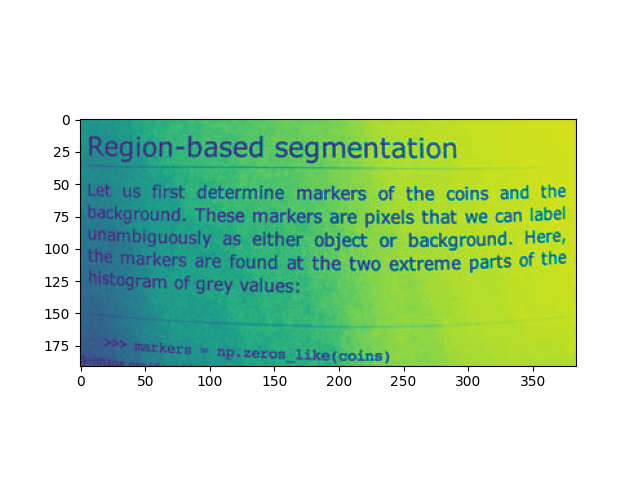

In [20]:
import numpy as np
import glob
import matplotlib.pyplot as plt
import skimage.io
import skimage.color
import skimage.filters
%matplotlib widget

# load the image
image = skimage.io.imread("Image/page.png", as_gray=True)

fig, ax = plt.subplots()
plt.imshow(image)
plt.show()

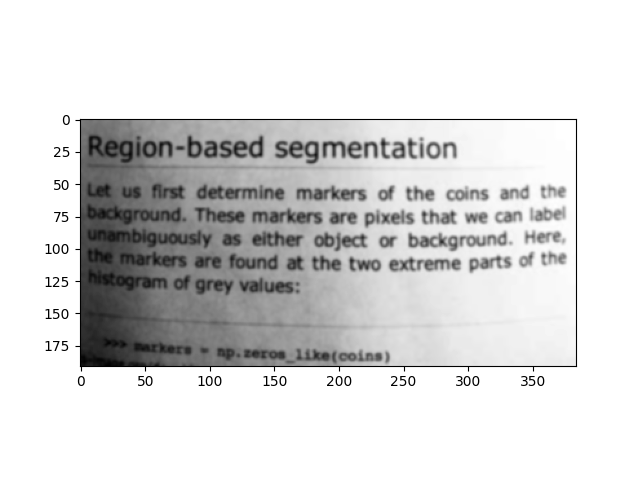

In [21]:
blurred_image = skimage.filters.gaussian(image, sigma=1.0)

fig, ax = plt.subplots()
plt.imshow(blurred_image, cmap='gray')
plt.show()

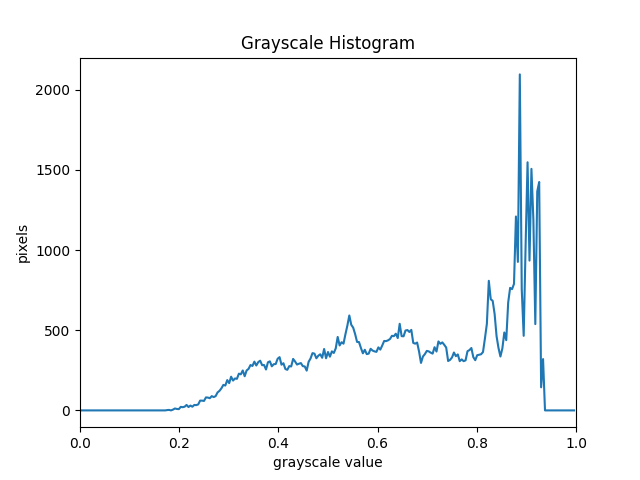

In [22]:
histogram, bin_edges = np.histogram(blurred_image, bins=256, range=(0.0, 1.0))

fig, ax = plt.subplots()
plt.plot(bin_edges[0:-1], histogram)
plt.title("Grayscale Histogram")
plt.xlabel("grayscale value")
plt.ylabel("pixels")
plt.xlim(0, 1.0)
plt.show()


In [40]:
# perform automatic thresholding
t = skimage.filters.threshold_otsu(blurred_image)
print("Found automatic threshold t = {}.".format(t)) 

Found automatic threshold t = 0.6563473596620193.


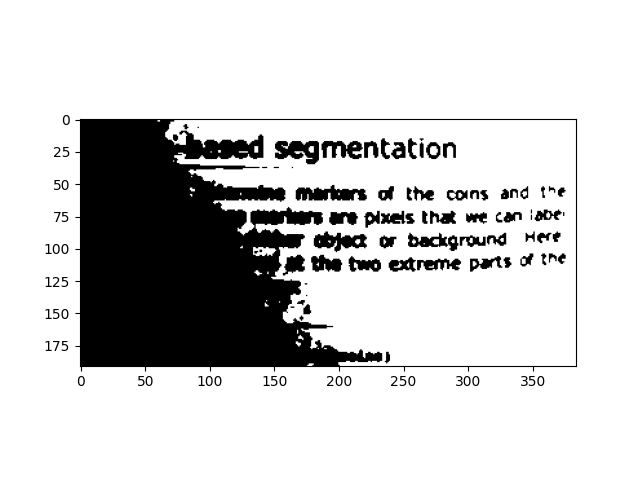

In [41]:
# create a binary mask with the threshold found by Otsu's method
binary_mask = blurred_image > t

fig, ax = plt.subplots()
plt.imshow(binary_mask, cmap='gray')
plt.show()

C:\Users\Admin\AppData\Local\Temp/ipykernel_7464/2655951093.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


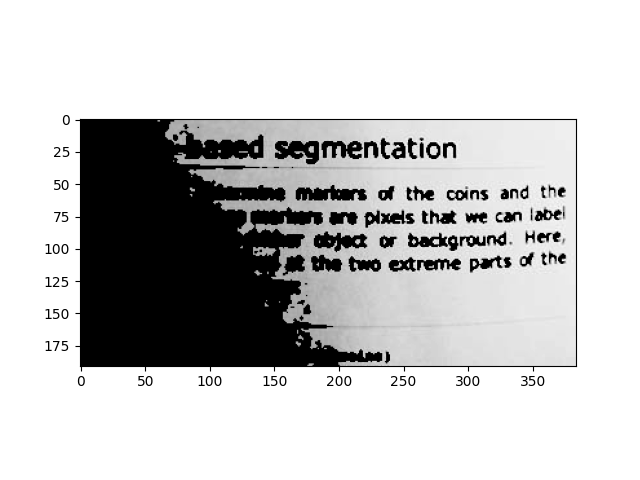

In [42]:
# apply the binary mask to select the foreground
selection = image.copy()
selection[~binary_mask] = 0

fig, ax = plt.subplots()
plt.imshow(selection, cmap='gray')
plt.show()

In [1]:
import cv2 
import numpy as np

img = cv2.imread('Image/page.png', cv2.IMREAD_GRAYSCALE)  

In [2]:
cv2.imshow('gray', img)
cv2.waitKey(0)

-1